In [1]:
import numpy as np

def get_curve(t):
    ct = np.array([2*t + 1, -t**2])
    return ct

# Programming exercises

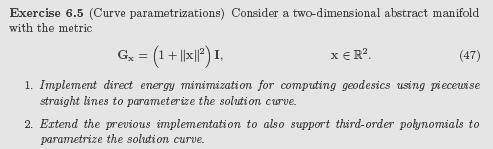

### Unsure if this is actually the way they want us to parameterize the curve. Couldn't get it to work with `torch`

In [2]:
import numpy as np
from scipy.optimize import minimize

def piecewise_curve(params, c0, c1, degree=1):
    """
    Degree = 1: Linearly interpolates between these points using the parameter values provided.
    Degree = 3: Third-order polynomial interpolation.
    """
    num_dimensions = len(c0)
    num_interior_points = len(params) // num_dimensions
    t_values = np.linspace(0, 1, num_interior_points + 2)
    
    if degree == 1:  # Linear interpolation
        curve_points = (1 - t_values[:, np.newaxis]) * c0 + t_values[:, np.newaxis] * c1
    elif degree == 3:  # Third-order polynomial interpolation
        curve_points = (1 - t_values[:, np.newaxis])**3 * c0 \
                       + 3 * (1 - t_values[:, np.newaxis])**2 * t_values[:, np.newaxis] * c0 \
                       + 3 * (1 - t_values[:, np.newaxis]) * t_values[:, np.newaxis]**2 * c1 \
                       + t_values[:, np.newaxis]**3 * c1
    else:
        raise ValueError("Degree not supported")
    
    return curve_points


def energy_functional(params, c0, c1, degree=1):
    """Calculates the metric along the curve and integrates
    the squared norm of tangent vectors weighted by the metric."""
    curve_points = piecewise_curve(params, c0, c1, degree)
    tangent_vectors = curve_points[1:] - curve_points[:-1]
    metric = 1 + np.sum(curve_points**2, axis=1)[:-1]
    energy = np.sum(metric * np.sum(tangent_vectors**2, axis=1))
    return energy

def compute_geodesic(c0, c1, degree=1, num_points=10):
    num_dimensions = len(c0)
    initial_params = np.random.rand(num_dimensions * (num_points - 1))
    result = minimize(energy_functional, initial_params, args=(c0, c1, degree), method='L-BFGS-B')
    optimal_params = result.x
    optimal_curve = piecewise_curve(optimal_params, c0, c1, degree)
    return optimal_curve

# Example 2D space end/start.
c0 = np.array([0.0, 0.0])
c1 = np.array([1.0, 1.0])

# Example usage for linear interpolation
optimal_geodesic_linear = compute_geodesic(c0, c1, degree=1, num_points=10)

# Example usage for third-order polynomial interpolation
optimal_geodesic_poly = compute_geodesic(c0, c1, degree=3, num_points=10)

print("Optimal Geodesic Curve (Linear Interpolation):")
print(optimal_geodesic_linear)

print("Optimal Geodesic Curve (Third-order Polynomial Interpolation):")
print(optimal_geodesic_poly)

Optimal Geodesic Curve (Linear Interpolation):
[[0.  0. ]
 [0.1 0.1]
 [0.2 0.2]
 [0.3 0.3]
 [0.4 0.4]
 [0.5 0.5]
 [0.6 0.6]
 [0.7 0.7]
 [0.8 0.8]
 [0.9 0.9]
 [1.  1. ]]
Optimal Geodesic Curve (Third-order Polynomial Interpolation):
[[0.    0.   ]
 [0.028 0.028]
 [0.104 0.104]
 [0.216 0.216]
 [0.352 0.352]
 [0.5   0.5  ]
 [0.648 0.648]
 [0.784 0.784]
 [0.896 0.896]
 [0.972 0.972]
 [1.    1.   ]]


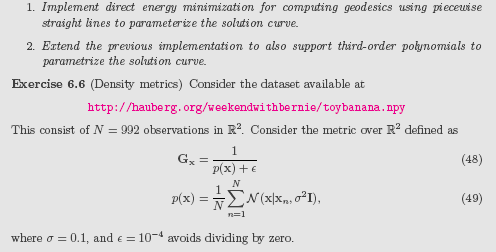

### Allegedly, Daniel got this to work. So I've decided not to spend time on it w.r.t. mini-project